In [177]:
#importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# EDA

In [178]:
#importing dataset

df = pd.read_csv(r'../RATINGS PREDICTION_PROJECT/Web scrapping/Rattings_data.csv')


In [179]:
#checking data
df

,Rattings,Reviews
0,5,- I am using this laptop for about 15 days and...
1,1,I got a faulty product the charger wasn’t work...
2,5,one of the best thermals out there intels new ...
3,5,Best gaming laptop in this range even after lo...
4,5,"Loved this Laptop, Simply Amazing, Go for it"
...,...,...
6265,3,1. It is not at all rubbery.2. You won't be ab...
6266,5,Fits well and soft . Prevents dirt from gettin...
6267,5,This has very good fit for Asus TUF A17 2021 m...
6268,5,Fits the 2021 A15 rtx 3060 eclipse grey varian...


In [180]:
#checking df.head for starting 5 data
df.head()

,Rattings,Reviews
0,5,- I am using this laptop for about 15 days and...
1,1,I got a faulty product the charger wasn’t work...
2,5,one of the best thermals out there intels new ...
3,5,Best gaming laptop in this range even after lo...
4,5,"Loved this Laptop, Simply Amazing, Go for it"


In [181]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6270 entries, 0 to 6269
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rattings  6270 non-null   int64 
 1   Reviews   6270 non-null   object
dtypes: int64(1), object(1)
memory usage: 98.1+ KB


we can see that there are 2 'Rattings', 'Reviews'  columns and datatypes are 1 is int and another one is object datatype.

In [182]:
#Calculating length of all review data before cleansing the data.
df['length'] = df['Reviews'].str.len()
df

,Rattings,Reviews,length
0,5,- I am using this laptop for about 15 days and...,1020
1,1,I got a faulty product the charger wasn’t work...,192
2,5,one of the best thermals out there intels new ...,187
3,5,Best gaming laptop in this range even after lo...,559
4,5,"Loved this Laptop, Simply Amazing, Go for it",44
...,...,...,...
6265,3,1. It is not at all rubbery.2. You won't be ab...,493
6266,5,Fits well and soft . Prevents dirt from gettin...,64
6267,5,This has very good fit for Asus TUF A17 2021 m...,114
6268,5,Fits the 2021 A15 rtx 3060 eclipse grey varian...,57


# Data Cleaning

In [183]:
# Convert all messages to lower case
df['Reviews'] = df['Reviews'].str.lower()

In [184]:
# Replace URLs with 'webaddress'
df['Reviews'] = df['Reviews'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [185]:
# Replace email addresses with 'email'
df['Reviews'] = df['Reviews'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [186]:
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['Reviews'] = df['Reviews'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

In [187]:
# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['Reviews'] = df['Reviews'].str.replace(r'£|\$', 'dollers')

In [188]:
# Replace numbers with 'numbr'
df['Reviews'] = df['Reviews'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [189]:
# replace "-" hyphen using 'empty space'
df['Reviews'] = df['Reviews'].str.replace(r'-','')

In [190]:
#converting object datatype to string
df['Reviews']= df['Reviews'].astype('str')

In [191]:
df['clean_length'] = df.Reviews.str.len() # checking the length of the words post cleaning.
df.head()

,Rattings,Reviews,length,clean_length
0,5,i am using this laptop for about numbr days a...,1020,1030
1,1,i got a faulty product the charger wasn’t work...,192,204
2,5,one of the best thermals out there intels new ...,187,188
3,5,best gaming laptop in this range even after lo...,559,567
4,5,"loved this laptop, simply amazing, go for it",44,44


As we can see from the above that our data is cleaned

# Pre-processing

In [192]:
labels = df.Rattings
Text = df.Reviews

In [193]:
from sklearn.feature_extraction.text import CountVectorizer

In [194]:
cv = CountVectorizer(binary = True)
cv.fit(Text)
x = cv.transform(Text)

In [195]:
x

<6270x11650 sparse matrix of type '<class 'numpy.int64'>'
	with 249762 stored elements in Compressed Sparse Row format>

In [196]:
y = labels

# Selecting parameters for training

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [198]:
accu = 0
for i in range(0,500):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25, random_state = i)
    mod = LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc> accu:
        accu= acc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 75.12755102040816 found on randomstate 25


In [199]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25, random_state = best_rstate)

### Selecting the Best model for Training

In [201]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, cross_validate, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn import metrics

In [202]:
def sort_mod(estimator, x_train, y_train, cv=5, verbose=True):
   
    scoring = {"accuracy": "accuracy",
               "precision": "precision_weighted",
               "recall": "recall_weighted",
               "f1": "f1_weighted"}
    scores = cross_validate(estimator, x_train, y_train, cv=cv, scoring=scoring)
    accuracy, accuracy_std = scores['test_accuracy'].mean(),scores['test_accuracy'].std()
    precision, precision_std = scores['test_precision'].mean(),scores['test_precision'].std()
    recall, recall_std = scores['test_recall'].mean(),scores['test_recall'].std()
    f1, f1_std = scores['test_f1'].mean(),scores['test_f1'].std()

    
    ScoRes = {"Accuracy": accuracy,"Accuracy std": accuracy_std,"Precision": precision,"Precision std": precision_std,
              "Recall": recall,"Recall std": recall_std,"f1": f1,"f1 std": f1_std,}
    
    if verbose:
        print(f"Accuracy: {accuracy} - (std: {accuracy_std})")
        print(f"Precision: {precision} - (std: {precision_std})")
        print(f"Recall: {recall} - (std: {recall_std})")
        print(f"f1: {f1} - (std: {f1_std})")

    return ScoRes

In [204]:
models = [LogisticRegression(), GaussianNB(), RandomForestClassifier(random_state=42),
          DecisionTreeClassifier(random_state=42), ExtraTreeClassifier(random_state=42), 
          AdaBoostClassifier(random_state=42), GradientBoostingClassifier(random_state=42)]

model_names = ["LogisticRegression", "Naive Bayes Gaussian", "Random Forest",
               "Decision Tree", "Extra Tree", "Ada Boost", 
               "Gradient Boosting"]

In [205]:
accuracy = []
precision = []
recall = []
f1 = []

for model in range(len(models)):
    print(f"\n\nStep {model+1} of {len(models)}")
    print(f"....................................................................running {model_names[model]}")
    
    clf_scores = sort_mod(models[model], x_train, y_train)
    
    accuracy.append(clf_scores["Accuracy"])
    precision.append(clf_scores["Precision"])
    recall.append(clf_scores["Recall"])
    f1.append(clf_scores["f1"])



Step 1 of 7
....................................................................running LogisticRegression
Accuracy: 0.6950209148257851 - (std: 0.014023043862557613)
Precision: 0.6758281036523647 - (std: 0.01614048356571777)
Recall: 0.6950209148257851 - (std: 0.014023043862557613)
f1: 0.6792754377793082 - (std: 0.014714949285021607)


Step 2 of 7
....................................................................running Naive Bayes Gaussian
Accuracy: nan - (std: nan)
Precision: nan - (std: nan)
Recall: nan - (std: nan)
f1: nan - (std: nan)


Step 3 of 7
....................................................................running Random Forest
Accuracy: 0.7141614850656838 - (std: 0.017470287666467993)
Precision: 0.7456439331461492 - (std: 0.02673628421952483)
Recall: 0.7141614850656838 - (std: 0.017470287666467993)
f1: 0.6757097975015695 - (std: 0.01958474852674387)


Step 4 of 7
....................................................................running Decision Tree
Accuracy: 0.6369

In [206]:
df_result = pd.DataFrame({"Model": model_names,
                          "accuracy": accuracy,
                          "precision": precision,
                          "recall": recall,
                          "f1": f1})
df_result.sort_values(by="f1", ascending=False)

,Model,accuracy,precision,recall,f1
0,LogisticRegression,0.695021,0.675828,0.695021,0.679275
2,Random Forest,0.714161,0.745644,0.714161,0.675710
3,Decision Tree,0.636959,0.628921,0.636959,0.631355
6,Gradient Boosting,0.644621,0.635115,0.644621,0.589588
4,Extra Tree,0.590174,0.586137,0.590174,0.587217
5,Ada Boost,0.586985,0.527481,0.586985,0.532274
1,Naive Bayes Gaussian,NaN,NaN,NaN,NaN


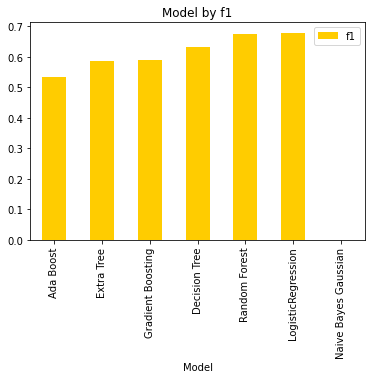

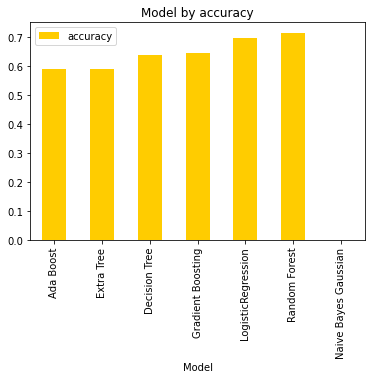

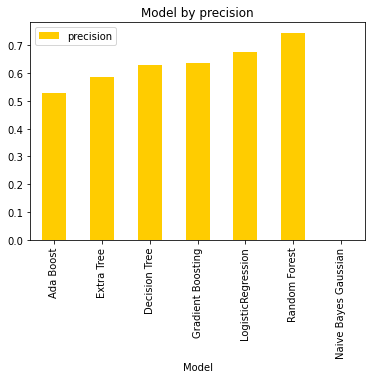

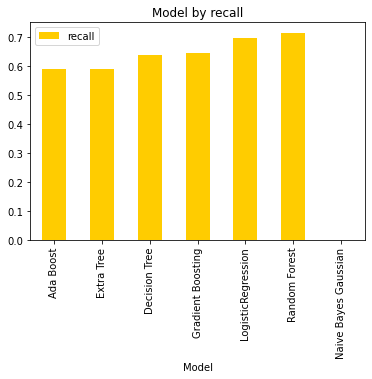

In [211]:
metrics_list = ["f1", "accuracy", "precision", "recall"]

for metric in metrics_list:
    df_result.sort_values(by=metric).plot.bar("Model", metric, color = '#FFCC00')
    plt.title(f"Model by {metric}")
    plt.show()

### As we can see from the above that Random Forest is top in the chart with the following metrics we will Hyper tune Random Forest to get better results.

#### Random Forest

1. accuracy: 0.714161

2. precision: 0.745644

3. recall: 0.714161

4. f1: 0.675710

In [214]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [242]:
clf_rf =  RandomForestClassifier(random_state=42)
clf_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [243]:
y_pred_prob=clf_rf.predict_proba(x_test)
y_pred_prob

array([[0.27, 0.05, 0.11, 0.13, 0.44],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.2 , 0.04, 0.09, 0.26, 0.41],
       ...,
       [0.53, 0.05, 0.08, 0.11, 0.23],
       [0.77, 0.04, 0.08, 0.05, 0.06],
       [0.17, 0.07, 0.05, 0.25, 0.46]])

In [244]:
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)

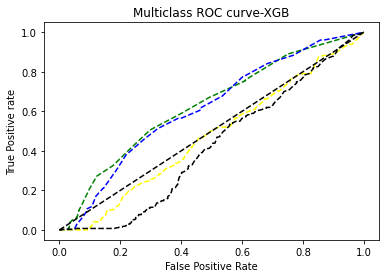

In [245]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')

plt.title('Multiclass ROC curve-XGB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.plot([0,1],[0,1],'k--')
plt.show()

In [246]:
clf_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [247]:
preds = cross_val_predict(clf_rf, x_train, y_train, cv=5, n_jobs=-1)
pd.crosstab(y_train, preds, rownames = ['Real'], colnames =['Predicted'])

Predicted,1,2,3,4,5
Real,,,,,
1,1019,11,2,6,115
2,110,68,1,4,77
3,93,5,128,19,166
4,86,2,0,262,536
5,62,7,4,38,1881


In [248]:
print(metrics.classification_report(y_train, preds, zero_division=0))

              precision    recall  f1-score   support

           1       0.74      0.88      0.81      1153
           2       0.73      0.26      0.39       260
           3       0.95      0.31      0.47       411
           4       0.80      0.30      0.43       886
           5       0.68      0.94      0.79      1992

    accuracy                           0.71      4702
   macro avg       0.78      0.54      0.58      4702
weighted avg       0.74      0.71      0.68      4702



# HYPERPARAMETER

In [249]:
param_grid = [
    {"n_estimators": range(20, 200, 20), 
     "bootstrap": [True, False],
     "criterion": ["gini", "entropy"],   
     "max_depth": [2, 4, 6, 8, 10, 12, 14, None],
     "max_features": ["auto", "sqrt", "log2"], 
     "min_samples_split": [2, 5, 10],
     "min_samples_leaf": [1, 2, 4],
     }
]

clf_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [250]:
clf_random = GridSearchCV(clf_rf, param_grid, cv=3,
                           scoring="f1_weighted", verbose=2, n_jobs=-1)

In [251]:
clf_random.fit(x_train, y_train)

Fitting 3 folds for each of 7776 candidates, totalling 23328 fits
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, crite

[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_

[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_

[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_

[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_

[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_

[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=160; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=180; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, mi

[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2,

[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_

[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=180; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=180; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4,

[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=160; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=160; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4,

[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=160; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=160; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=160; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, m

[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=160; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, m

[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=180; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, m

[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=40; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=40; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_

[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=180; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min

[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_

[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=160; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, 

[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=160; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, m

[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=160; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, m

[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=40; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=180; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, 

[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=180; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=160; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, m

[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=180; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=180; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, 

[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=40; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=40; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min

[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=180; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=160; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, 

[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, mi

[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=160; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_

[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=180; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=160; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, 

[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=180; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1,

[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_s

[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=180; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, 

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=40; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4,

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=40; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=160; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=160; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=40; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=160; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=40; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=

[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=160; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=

[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf

[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=40; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=160; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=40; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf

[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=160; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=160; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_l

[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=160; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=40; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=auto, min_samples_lea

[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=180; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   1.6s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=auto, min_samples_lea

[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4

[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=160; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=log2, min_samples_

[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=180; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   3.4s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   5.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   8.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   3.9s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   6.4s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   3.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=160; total time=   4.4s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   2.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto,

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=160; total time=   2.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   1.5s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=40; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, mi

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   1.5s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.8s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   3.8s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, m

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   1.7s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=180; total time=   2.7s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=160; total time=   2.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=180; total time=   0.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto,

[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=180; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=160; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=40; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, 

[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=180; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=sqrt

[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=160; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, 

[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=160; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, mi

[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=sqrt, m

[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=160; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, 

[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   0.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=sqrt, 

[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt

[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_s

[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, 

[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=180; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=160; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, m

[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=160; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=40; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min

[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=160; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt

[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=180; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, max_features=log2

[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=160; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=160; total time=   0.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt

[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   0.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=160; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=160; total time=   0.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt,

[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=180; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   0.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt,

[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt,

[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=180; total time=   1.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=160; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt,

[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=40; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   0.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, mi

[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, max_features=log2, min

[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=180; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=160; total time=   0.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, 

[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=180; total time=   0.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=40; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=40; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, m

[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=160; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2,

[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=160; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=160; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, mi

[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   0.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, 

[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, 

[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=160; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=40; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, mi

[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=160; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=160; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=40; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, m

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=160; total time=   0.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160; total time=   1.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_featur

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=160; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=160; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_feature

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=160; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=180; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=160; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=160; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=

[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=160; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=180; total time=   1.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_featur

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=180; total time=   0.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   1.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=160; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=180; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=180; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=180; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=160; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_featur

[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=40; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=180; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_featu

[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   1.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   1.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   1.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=

[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=160; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   1.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   1.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_feature

[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=160; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   1.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   1.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=aut

[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=180; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   1.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   3.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   6.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   4.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=40; total time=   1.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   2.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=40; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   1.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   1.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=Non

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   1.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160; total time=   1.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   1.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=Non

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=160; total time=   1.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, ma

[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=160; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=160; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf

[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=160; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=160; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_lea

[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=160; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=40; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf

[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=180; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=40; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=auto, min_samples_lea

[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=160; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, min_samples_

[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=180; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=160; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=160; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=160; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=auto, min_samples_lea

[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_lea

[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=160; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=180; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf

[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=180; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_lea

[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=160; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=160; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_

[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=log2, min_samples_lea

[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=40; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=180; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=180; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=160; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, min_samples_

[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=180; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=180; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=log2, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=log2, min_samples_lea

[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=180; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=log2, min_samples_

[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1,

[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=180; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=6, max_features=log2, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=160; total time=   0.9s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=sqrt, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=160; total time=   1.0s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=180; total time=   0.9s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=160; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_

[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=40; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf

[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf

[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=180; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=160; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf

[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=180; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=160; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=8, max_features=log2, min_samples_lea

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=160; total time=   0.9s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.9s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samp

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=180; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   1.2s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   1.8s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_sa

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=160; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=180; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_s

[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   1.1s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   1.2s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_sample

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=180; total time=   1.0s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   1.1s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   1.5s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_s

[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   1.1s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   1.1s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_sampl

[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   1.0s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_

[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   0.9s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=12, max_features=log2, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   1.1s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=180; total time=   1.8s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=160; total time=   1.5s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_sa

[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   1.1s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   1.8s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   1.0s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=160; total time=   1.4s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samp

[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   1.2s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=40; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=160; total time=   1.7s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_s

[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   1.1s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_

[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_sa

[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   1.0s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   1.6s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160; total time=   1.4s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=sqrt, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=160; total time=   1.7s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   1.0s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=180; total time=   1.8s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=sqrt, min_s

[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=180; total time=   0.9s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=180; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=14, max_features=log2, min_sa

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   1.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   2.3s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=a

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   2.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=40; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   1.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   1.9s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=aut

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   1.8s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180; total time=   2.7s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   2.4s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180; total time=   3.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=160; total time=   2.5s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   1.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   1.7s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_feature

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   6.4s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=40; total time=   1.4s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   3.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   4.6s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_feature

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.9s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   1.7s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   2.7s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   3.5s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   6.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   8.3s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqr

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=160; total time=   2.5s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   1.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   1.8s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=180; total time=   2.9s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_featur

[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=160; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=180; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=160; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_featu

[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=160; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=160; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=a

[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=160; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=180; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_featur

[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=160; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, max_features=

[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=160; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=160; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=s

[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   0.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=160; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   0.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=180; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=40; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=s

[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=lo

[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=40; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=lo

[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=180; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   0.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=s

[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=160; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=160; total time=   0.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=

[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=160; total time=   0.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=160; total time=   0.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=40; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=180; total time=   0.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   0.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_featur

[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=l

[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=180; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=

[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=160; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=160; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=180; total time=   1.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_featur

[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=160; total time=   0.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   1.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=180; total time=   1.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_featur

[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=40; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_feature

[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=log2

[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=160; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=8, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=40; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   1.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_fe

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   1.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_featu

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_feat

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160; total time=   0.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_fea

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   0.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   0.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_fe

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_feat

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=160; total time=   0.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   0.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=160; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max

[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=180; total time=   1.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=160; total time=   1.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   1.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=180; total time=   1.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=160; total time=   1.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   1.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=160; total time=   1.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   2.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_fe

[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=160; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=12, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   1.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   2.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   1.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_fea

[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   1.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   2.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   1.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_feat

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 4, 6, 8, 10, 12, 14, None],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': range(20, 200, 20)}],
             scoring='f1_weighted', verbose=2)

[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   1.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   1.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   1.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=40; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=160; total time=   1.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_feat

[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   1.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=180; total time=   1.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=160; total time=   1.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_

[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   1.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   2.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   1.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=14, max_feat

In [252]:
clf_random.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 60}

In [253]:
clf_random.best_score_

0.6677851124785977

In [254]:
preds = cross_val_predict(clf_random.best_estimator_, x_train, y_train, cv=5, n_jobs=-1)
print(metrics.classification_report(y_train, preds, zero_division=0))

              precision    recall  f1-score   support

           1       0.74      0.88      0.81      1153
           2       0.99      0.25      0.40       260
           3       0.97      0.31      0.47       411
           4       0.85      0.30      0.44       886
           5       0.68      0.96      0.79      1992

    accuracy                           0.72      4702
   macro avg       0.84      0.54      0.58      4702
weighted avg       0.77      0.72      0.68      4702



In [255]:
classifier_final_model = clf_random.best_estimator_
y_pred = classifier_final_model.predict(x_test)
 
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'])

Predicted,1,2,3,4,5
Actual,,,,,
1,404,0,1,1,31
2,27,23,0,1,25
3,41,0,59,2,46
4,16,0,0,111,144
5,17,0,0,9,610


In [256]:
conf_mx = metrics.confusion_matrix(y_test, y_pred)

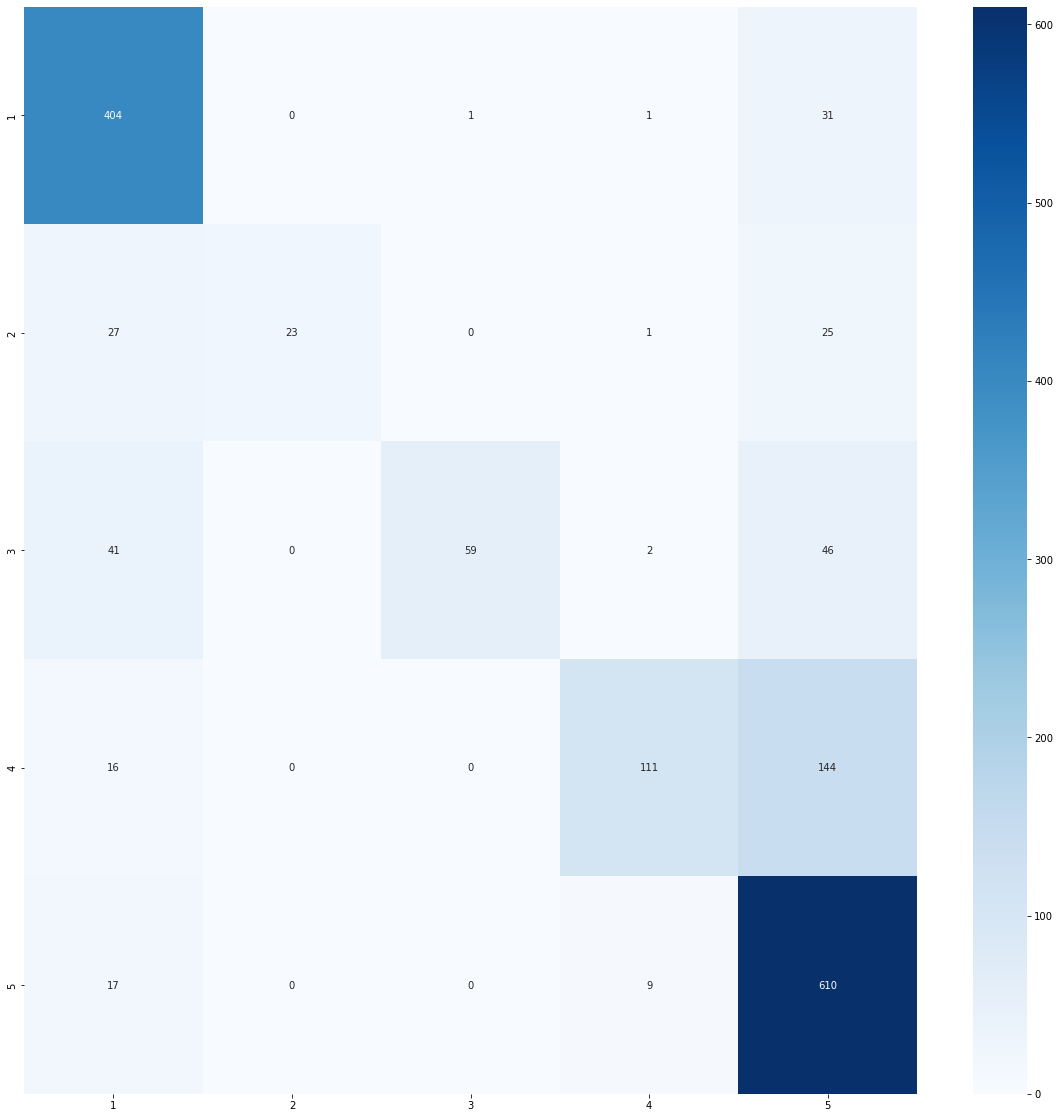

In [259]:
fig = plt.figure(figsize=(20,20))
ax = sns.heatmap(conf_mx, annot=True, fmt="d", 
                 xticklabels=classifier_final_model.classes_,
                 yticklabels=classifier_final_model.classes_,
                cmap= "Blues")

# Model saving

In [260]:
import joblib
joblib.dump(classifier_final_model,"Rattingprediction.obj")

['Rattingprediction.obj']